# SENA - Assignment presentation

# Basic Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import display, HTML
from math import pi
plt.style.use('fivethirtyeight')

%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH1 = '/content/fifa_data_2015_to_2020.csv'
DATA_PATH2 = '/content/players_20.csv'
df= pd.read_csv(DATA_PATH1, sep=',')
data= pd.read_csv(DATA_PATH2, sep=',')
display(df.head(5))

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,physic,attack_oa,skill_oa,movements_oa,power_oa,mentality_oa,defending_oa,gk_oa,trait_coef,year
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,...,63.0,83.0,90.0,94.0,75.0,54.0,22.0,11.0,16.0,2015.0
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,...,79.0,88.0,85.0,84.0,90.0,58.0,25.0,12.0,18.0,2015.0
2,9014,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,...,64.0,79.0,86.0,93.0,78.0,59.0,28.0,10.0,20.0,2015.0
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,...,86.0,84.0,84.0,73.0,85.0,60.0,28.0,12.0,20.0,2015.0
4,167495,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,...,0.0,28.0,29.0,62.0,57.0,25.0,25.0,90.0,8.0,2015.0


# Analysis 1 - EDA

In [ ]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'team_position',
       'team_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attack_oa', 'skill_oa', 'movements_oa',
       'power_oa', 'mentality_oa', 'defending_oa', 'gk_oa', 'trait_coef',
       'year'],
      dtype='object')

In [ ]:
def get_year(df,year):
    temp_data = df.query('year==@year').reset_index()
    return temp_data

In [ ]:
df_2015 = get_year(df,2015)
df_2016 = get_year(df,2016)
df_2017 = get_year(df,2017)
df_2018 = get_year(df,2018)
df_2019 = get_year(df,2019)
df_2020 = get_year(df,2020)
l_df=[df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]

EDA 1 - Overall rating distribution by year

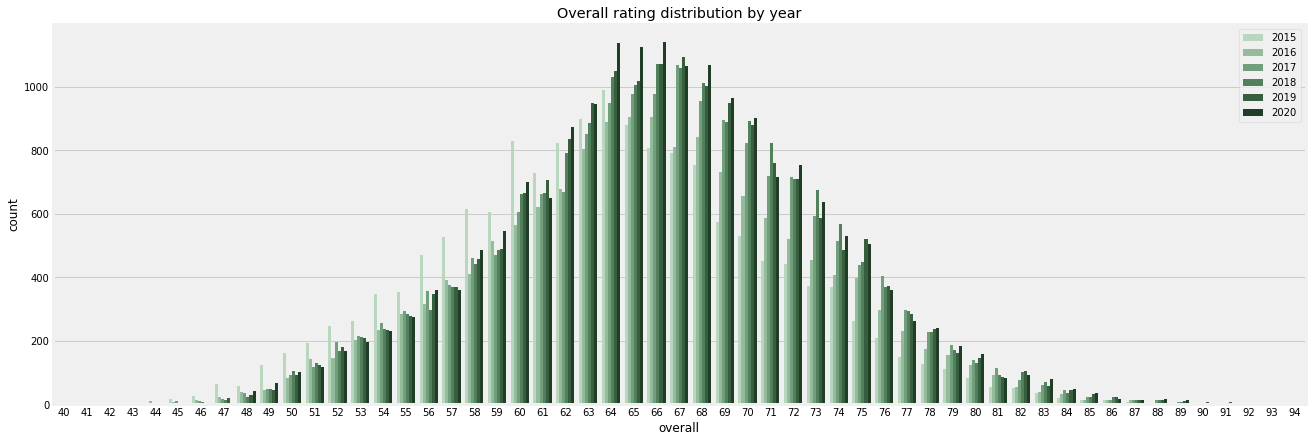

In [ ]:
plt.figure(figsize = (20,7))
sb.countplot(data = df, x = 'overall', hue='year', palette = sb.cubehelix_palette(6, start=5, rot=0, dark=0.2, light=.8, reverse=False))
plt.title('Overall rating distribution by year')
plt.legend(loc=1);

EDA 2 - Comparison of the top 5 players from 2015 to 2020

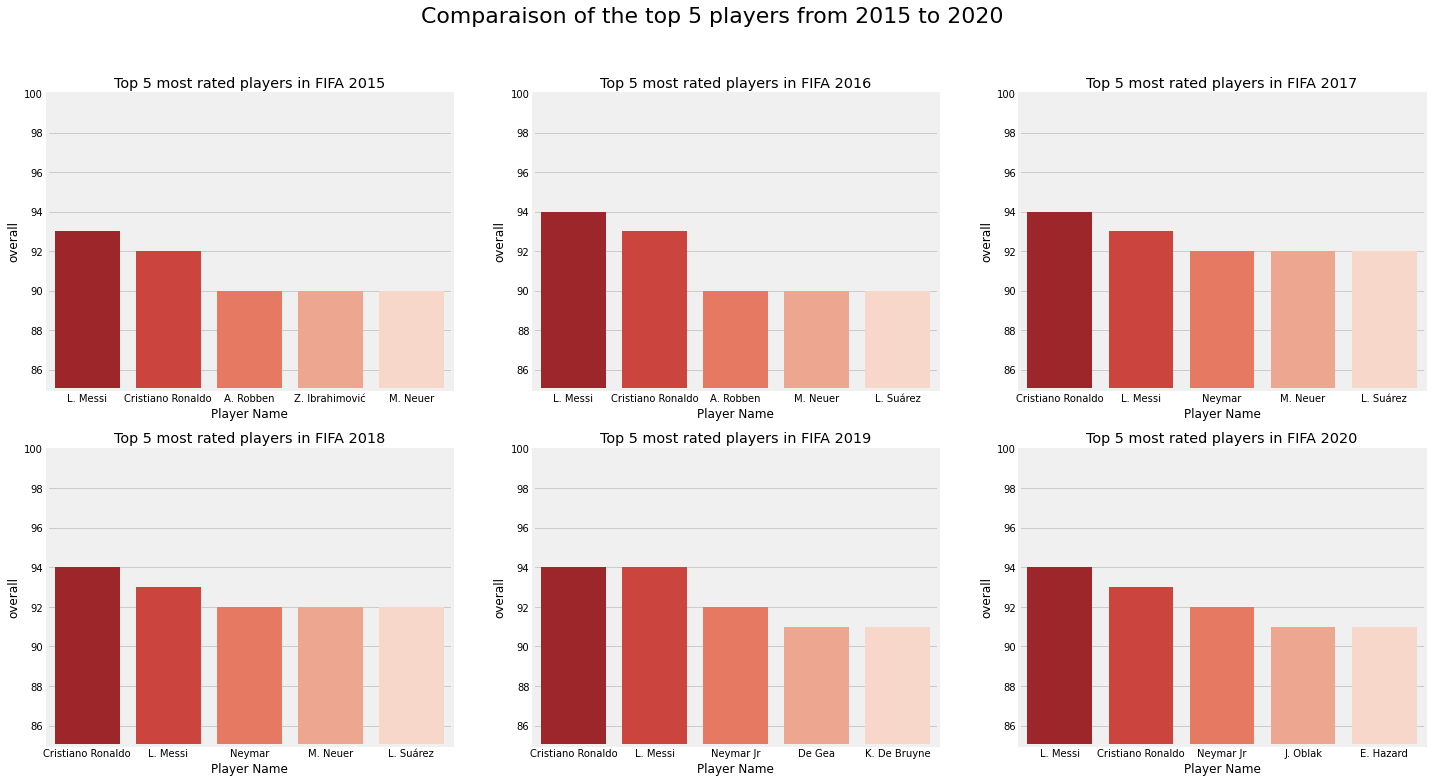

In [ ]:
l=[]
for i in l_df:
    temp = i.head(5)[['short_name','overall','year']]
    l.append(temp)
fig = plt.figure(figsize=(22,12))
plt.suptitle('Comparaison of the top 5 players from 2015 to 2020',fontsize=22)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.subplot(231)
sb.barplot(data=l[0], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2015')
plt.subplot(232)
sb.barplot(data=l[1], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2016')
plt.subplot(233)
sb.barplot(data=l[2], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2017')
plt.subplot(234)
sb.barplot(data=l[3], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2018')
plt.subplot(235)
sb.barplot(data=l[4], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2019')
plt.subplot(236)
sb.barplot(data=l[5], x='short_name', y='overall', palette='Reds_r')
plt.ylim(85, 100)
plt.xlabel('Player Name')
plt.title('Top 5 most rated players in FIFA 2020');

EDA 3 - Best overall rating for each position by year

In [ ]:
def get_player_noGK(df):
    idx_df_gk = list(df.query('pace==0').index)
    df_no_GK = df.drop(idx_df_gk)
    return df_no_GK

In [ ]:
def get_best_by_position(df):
    lis=[]
    temp = df.groupby(['team_position'])[['overall']].max()
    for i in list(temp.index):
        overall = temp.loc[i][0]
        best_i = df.query('team_position==@i & overall==@overall').iloc[0]
        lis.append(best_i)
    best_pos = pd.DataFrame(lis)
    return best_pos

In [ ]:
lis=[]
lis.append(get_best_by_position(df_2015))
lis.append(get_best_by_position(df_2016))
lis.append(get_best_by_position(df_2017))
lis.append(get_best_by_position(df_2018))
lis.append(get_best_by_position(df_2019))
lis.append(get_best_by_position(df_2020))
best_pos = pd.concat(lis, ignore_index=True)

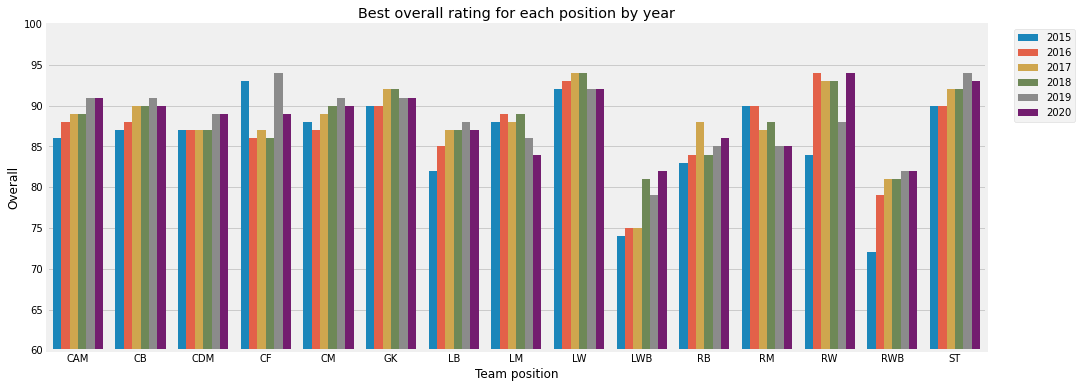

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Best overall rating for each position by year')
sb.barplot(data=best_pos, x='team_position', y='overall', hue='year')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('Team position')
plt.ylabel('Overall')
plt.ylim(60,100);

EDA 4 - Best Players in every position in each year

In [ ]:
gb = best_pos.groupby('team_position')    
l = [gb.get_group(x) for x in gb.groups]
for i in range(15):
  display(l[i].loc[:,['short_name','team_position','overall','club','nationality','year']])

,short_name,team_position,overall,club,nationality,year
0,J. Rodríguez,CAM,86,Real Madrid,Colombia,2015
15,David Silva,CAM,88,Manchester City,Spain,2016
30,M. Özil,CAM,89,Arsenal,Germany,2017
45,K. De Bruyne,CAM,89,Manchester City,Belgium,2018
60,K. De Bruyne,CAM,91,Manchester City,Belgium,2019
75,K. De Bruyne,CAM,91,Manchester City,Belgium,2020


,short_name,team_position,overall,club,nationality,year
1,Sergio Ramos,CB,87,Real Madrid,Spain,2015
16,Thiago Silva,CB,88,Paris Saint-Germain,Brazil,2016
31,J. Boateng,CB,90,FC Bayern München,Germany,2017
46,Sergio Ramos,CB,90,Real Madrid,Spain,2018
61,Sergio Ramos,CB,91,Real Madrid,Spain,2019
76,V. van Dijk,CB,90,Liverpool,Netherlands,2020


,short_name,team_position,overall,club,nationality,year
2,P. Lahm,CDM,87,FC Bayern München,Germany,2015
17,P. Lahm,CDM,87,FC Bayern München,Germany,2016
32,Sergio Busquets,CDM,87,FC Barcelona,Spain,2017
47,N. Kanté,CDM,87,Chelsea,France,2018
62,N. Kanté,CDM,89,Chelsea,France,2019
77,N. Kanté,CDM,89,Chelsea,France,2020


,short_name,team_position,overall,club,nationality,year
3,L. Messi,CF,93,FC Barcelona,Argentina,2015
18,T. Müller,CF,86,FC Bayern München,Germany,2016
33,T. Müller,CF,87,FC Bayern München,Germany,2017
48,D. Mertens,CF,86,Napoli,Belgium,2018
63,L. Messi,CF,94,FC Barcelona,Argentina,2019
78,A. Griezmann,CF,89,FC Barcelona,France,2020


,short_name,team_position,overall,club,nationality,year
4,B. Schweinsteiger,CM,88,FC Bayern München,Germany,2015
19,T. Kroos,CM,87,Real Madrid,Germany,2016
34,L. Modrić,CM,89,Real Madrid,Croatia,2017
49,T. Kroos,CM,90,Real Madrid,Germany,2018
64,L. Modrić,CM,91,Real Madrid,Croatia,2019
79,L. Modrić,CM,90,Real Madrid,Croatia,2020


,short_name,team_position,overall,club,nationality,year
5,M. Neuer,GK,90,FC Bayern München,Germany,2015
20,M. Neuer,GK,90,FC Bayern München,Germany,2016
35,M. Neuer,GK,92,FC Bayern München,Germany,2017
50,M. Neuer,GK,92,FC Bayern München,Germany,2018
65,De Gea,GK,91,Manchester United,Spain,2019
80,J. Oblak,GK,91,Atlético Madrid,Slovenia,2020


,short_name,team_position,overall,club,nationality,year
6,D. Alaba,LB,82,FC Bayern München,Austria,2015
21,D. Alaba,LB,85,FC Bayern München,Austria,2016
36,D. Alaba,LB,87,FC Bayern München,Austria,2017
51,Marcelo,LB,87,Real Madrid,Brazil,2018
66,Marcelo,LB,88,Real Madrid,Brazil,2019
81,Jordi Alba,LB,87,FC Barcelona,Spain,2020


,short_name,team_position,overall,club,nationality,year
7,E. Hazard,LM,88,Chelsea,Belgium,2015
22,E. Hazard,LM,89,Chelsea,Belgium,2016
37,E. Hazard,LM,88,Chelsea,Belgium,2017
52,A. Sánchez,LM,89,Arsenal,Chile,2018
67,I. Perišić,LM,86,Inter,Croatia,2019
82,K. Coman,LM,84,FC Bayern München,France,2020


,short_name,team_position,overall,club,nationality,year
8,Cristiano Ronaldo,LW,92,Real Madrid,Portugal,2015
23,Cristiano Ronaldo,LW,93,Real Madrid,Portugal,2016
38,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2017
53,Cristiano Ronaldo,LW,94,Real Madrid,Portugal,2018
68,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2019
83,Neymar Jr,LW,92,Paris Saint-Germain,Brazil,2020


,short_name,team_position,overall,club,nationality,year
9,M. Layún,LWB,74,Club América,Mexico,2015
24,C. Molinaro,LWB,75,Torino,Italy,2016
39,C. Molinaro,LWB,75,Torino,Italy,2017
54,Marcos Alonso,LWB,81,Chelsea,Spain,2018
69,Jonny,LWB,79,Wolverhampton Wanderers,Spain,2019
84,N. Schulz,LWB,82,Borussia Dortmund,Germany,2020


,short_name,team_position,overall,club,nationality,year
10,Dani Alves,RB,83,FC Barcelona,Brazil,2015
25,Dani Alves,RB,84,FC Barcelona,Brazil,2016
40,P. Lahm,RB,88,FC Bayern München,Germany,2017
55,Carvajal,RB,84,Real Madrid,Spain,2018
70,J. Kimmich,RB,85,FC Bayern München,Germany,2019
85,J. Kimmich,RB,86,FC Bayern München,Germany,2020


,short_name,team_position,overall,club,nationality,year
11,A. Robben,RM,90,FC Bayern München,Netherlands,2015
26,A. Robben,RM,90,FC Bayern München,Netherlands,2016
41,A. Robben,RM,87,FC Bayern München,Netherlands,2017
56,A. Robben,RM,88,FC Bayern München,Netherlands,2018
71,A. Robben,RM,85,FC Bayern München,Netherlands,2019
86,Koke,RM,85,Atlético Madrid,Spain,2020


,short_name,team_position,overall,club,nationality,year
12,A. Sánchez,RW,84,Arsenal,Chile,2015
27,L. Messi,RW,94,FC Barcelona,Argentina,2016
42,L. Messi,RW,93,FC Barcelona,Argentina,2017
57,L. Messi,RW,93,FC Barcelona,Argentina,2018
72,M. Salah,RW,88,Liverpool,Egypt,2019
87,L. Messi,RW,94,FC Barcelona,Argentina,2020


,short_name,team_position,overall,club,nationality,year
13,A. Elmohamady,RWB,72,Hull City,Egypt,2015
28,Bruno Peres,RWB,79,Torino,Brazil,2016
43,Bruno Peres,RWB,81,Roma,Brazil,2017
58,Mário Fernandes,RWB,81,PFC CSKA Moscow,Russia,2018
73,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2019
88,Mário Fernandes,RWB,82,PFC CSKA Moscow,Russia,2020


,short_name,team_position,overall,club,nationality,year
14,Z. Ibrahimović,ST,90,Paris Saint-Germain,Sweden,2015
29,L. Suárez,ST,90,FC Barcelona,Uruguay,2016
44,L. Suárez,ST,92,FC Barcelona,Uruguay,2017
59,L. Suárez,ST,92,FC Barcelona,Uruguay,2018
74,Cristiano Ronaldo,ST,94,Juventus,Portugal,2019
89,Cristiano Ronaldo,ST,93,Juventus,Portugal,2020


# Analysis 2 - Player overall rating/brand value prediction

In [ ]:
# Construction of the features dataframe for the regression model

years=[2019,2018,2017,2016,2015]
features_selected = ['age','wage_eur', 'value_eur','international_reputation', 'pace','skill_moves' ,'shooting', 'passing', 'dribbling',
            'defending', 'physic','skill_oa', 'attack_oa', 'movements_oa', 'power_oa', 'mentality_oa', 'gk_oa',
            'defending_oa',  'trait_coef','year']

ols_xdata = df.query('year in @years')[features_selected].copy()
ols_ydata = df.query('year in @years')['overall'].copy()

ols_xdata.loc[ols_xdata.value_eur==0,'value_eur'] = ols_xdata['value_eur'].mean()
ols_xdata.loc[ols_xdata.wage_eur==0,'wage_eur'] = ols_xdata['wage_eur'].mean()

ols_xdata['isGK'] = (ols_xdata['pace']==0).astype(int)
cols = list(ols_xdata.columns)
ols_xdata

,age,wage_eur,value_eur,international_reputation,pace,skill_moves,shooting,passing,dribbling,defending,...,skill_oa,attack_oa,movements_oa,power_oa,mentality_oa,gk_oa,defending_oa,trait_coef,year,isGK
0,27,9041.502956,1.758932e+06,5,93.0,4,89.0,86.0,96.0,27.0,...,90.0,83.0,94.0,75.0,54.0,11.0,22.0,16,2015,0
1,29,9041.502956,1.758932e+06,5,93.0,5,93.0,81.0,91.0,32.0,...,85.0,88.0,84.0,90.0,58.0,12.0,25.0,18,2015,0
2,30,9041.502956,1.758932e+06,5,93.0,4,86.0,83.0,92.0,32.0,...,86.0,79.0,93.0,78.0,59.0,10.0,28.0,20,2015,0
3,32,9041.502956,1.758932e+06,5,76.0,4,91.0,81.0,86.0,34.0,...,84.0,84.0,73.0,85.0,60.0,12.0,28.0,20,2015,0
4,28,9041.502956,1.758932e+06,5,0.0,1,0.0,0.0,0.0,0.0,...,29.0,28.0,62.0,57.0,25.0,90.0,25.0,8,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82712,19,1000.000000,6.000000e+04,1,52.0,2,32.0,46.0,45.0,46.0,...,39.0,38.0,55.0,45.0,43.0,10.0,46.0,0,2019,0
82713,18,1000.000000,6.000000e+04,1,64.0,2,43.0,40.0,52.0,23.0,...,42.0,41.0,61.0,54.0,37.0,11.0,22.0,0,2019,0
82714,20,1000.000000,6.000000e+04,1,81.0,2,35.0,47.0,49.0,44.0,...,42.0,41.0,71.0,49.0,44.0,11.0,44.0,0,2019,0
82715,19,1000.000000,4.000000e+04,1,63.0,2,42.0,38.0,50.0,41.0,...,36.0,42.0,62.0,55.0,42.0,13.0,41.0,0,2019,0


In [ ]:
# Adding 2nd degree polynomial features to make the regression model more accurate

polynomial = PolynomialFeatures(2, include_bias=False)
ols_xdata = polynomial.fit_transform(ols_xdata)

In [ ]:
# Train/Test data split

#xtrain, xtest, ytrain, ytest = train_test_split( ols_xdata, ols_ydata, test_size=0.2, shuffle=True, random_state=42)
xtrain,ytrain=ols_xdata,ols_ydata

display((xtrain.shape, ytrain.shape))

((82717, 252), (82717,))

In [ ]:

x_2020 = df.query('year ==2020')[features_selected].copy()
x_2020['isGK'] = (x_2020['pace']==0).astype(int)
x_2020 = polynomial.fit_transform(x_2020)
y_2020 = np.array(df.query('year==2020')['overall'].copy()).flatten()
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)
ypred = regression.predict(x_2020)
predicted_2020 = np.round(regression.predict(x_2020)).astype(int)

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_2020, predicted_2020))
print('Coefficient of determination: %.2f'% r2_score(y_2020, predicted_2020))

Mean squared error: 2.04
Coefficient of determination: 0.96


In [ ]:
# Choosing a player from the dataset

def get_player(df,features_selected):
    player= df.sample(1)
    player_x = player[features_selected].copy()
    player_x['isGK'] = (player_x['pace']==0).astype(int)
    player_x= polynomial.fit_transform(player_x)
    player_y = np.array(player['overall'].copy())
    return player_x,player_y

In [ ]:
#Predicting the overall rating of the random player
player_x,player_y = get_player(df, features_selected)
estimated_y = regression.predict(player_x)
print('Actual value y=',int(player_y), 'Predicted value=', int(np.round(estimated_y)))

Actual value y= 70 Predicted value= 68


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


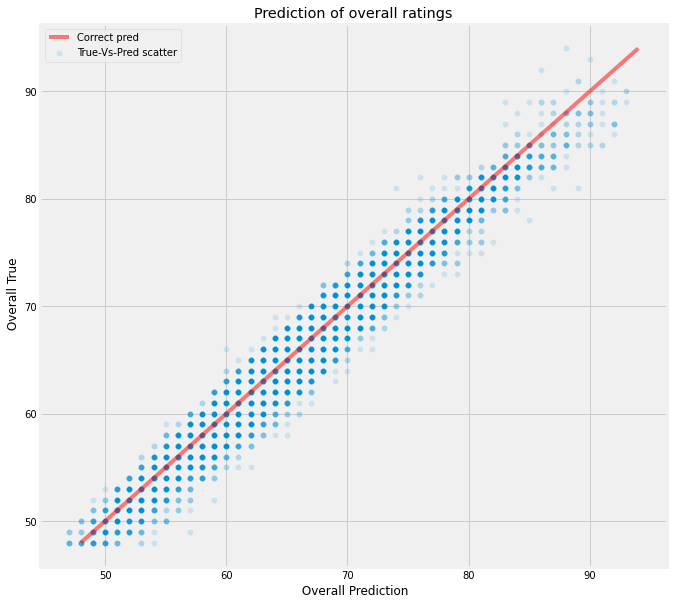

In [ ]:
plt.figure(figsize=(10,10))
sb.scatterplot(predicted_2020, y_2020, alpha=0.15)
plt.plot(y_2020, y_2020, color='r', alpha=0.5)
plt.legend(['Correct pred','True-Vs-Pred scatter'])
plt.title('Prediction of overall ratings')
plt.xlabel(' Overall Prediction')
plt.ylabel(' Overall True');

# Analysis 3 - Community detection or Clustering with respect to Player position

## Preprocessing

In [ ]:
display(data.head())
print(f'The Data has {data.shape[0]} rows and {data.shape[1]} features')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


The Data has 18278 rows and 104 features


## Data understanding and cleaning

In [ ]:
# Taking the first preference of each player's preferred player position
data['player_positions'] = data['player_positions'].str.split(',').str[0]

In [ ]:
# Making a copy of the original dataset before further analysis
copy_of_dataset = data.copy()

In [ ]:
# function to generate samples of the desired player positions
def sample_generate(positions = ['CAM', 'RM', 'CDM', 'LM', 'CM'], n_samples = 10):
    '''
    available unique player positions to be clustered = ['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB']
    '''
    samples = copy_of_dataset[copy_of_dataset.player_positions.isin(positions) & (copy_of_dataset.overall>=70)].sample(n_samples)
    return samples.index.values


Player Ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


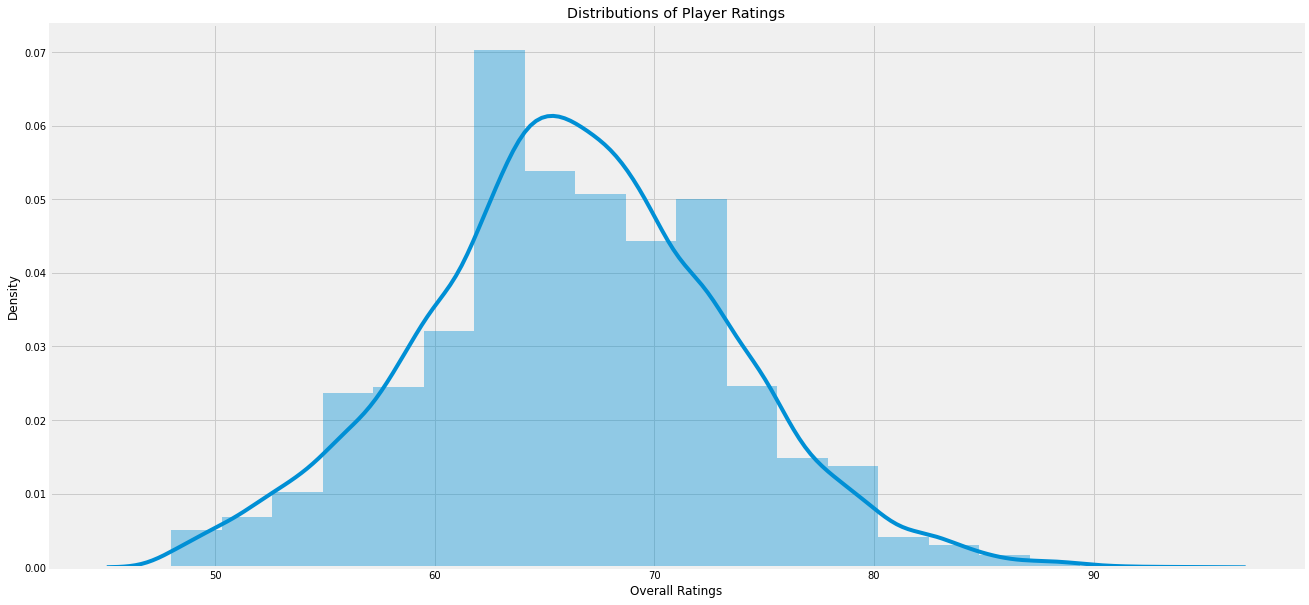

In [ ]:
plt.figure(figsize=(20,10))
ax = sb.distplot(data.overall, bins=20);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

In [ ]:
data = data[data.overall>=70]   # Removing players with rating below 70

In [ ]:
pd.DataFrame(data.overall.value_counts().sort_index())

,overall
70,902
71,715
72,753
73,638
74,529
75,506
76,361
77,262
78,239
79,185


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


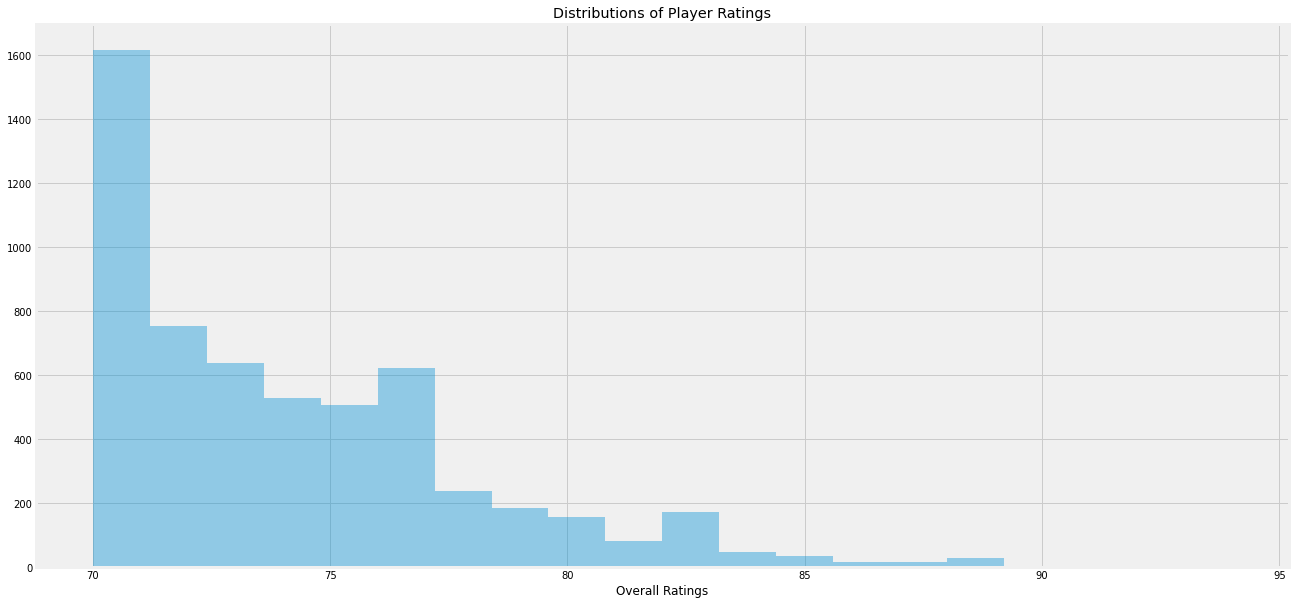

In [ ]:
# Visualizing updated player ratings after removal
plt.figure(figsize=(20,10))
ax = sb.distplot(data.overall, bins=20,vertical=False,kde=False);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


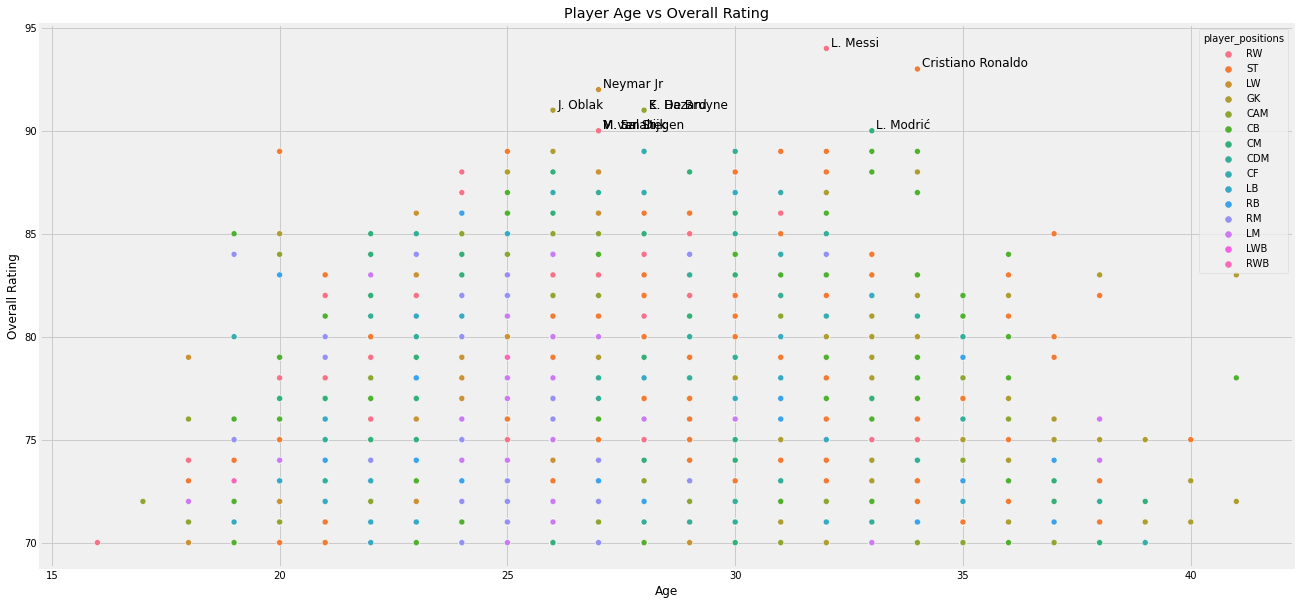

In [ ]:
# Plotting Age Vs Player rating 
plt.figure(figsize=(20,10))
ax = sb.scatterplot('age','overall',hue='player_positions',data=data);
ax.set_title('Player Age vs Overall Rating')
ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if (point['y'] >=90) :
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize=12)

label_point( data.age,data.overall, data.short_name, plt.gca())  

Dropping unecessary features

In [ ]:
to_drop = ['sofifa_id','player_url','long_name','potential','dob',\
           'work_rate','body_type','real_face','release_clause_eur','player_tags',\
           'team_position','team_jersey_number','loaned_from','joined','contract_valid_until',\
           'nation_position','nation_jersey_number','player_traits',\
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',\
           'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb', 'value_eur','wage_eur']
data = data.drop(to_drop, axis=1)

In [ ]:
pd.DataFrame(data.dtypes).T

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,object,int64,int64,int64,object,object,int64,object,object,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Checking for correlated features using a heatmap

In [ ]:
# Create correlation matrix as the data is still suspected to be highly correlated
corr_matrix = data.corr().abs()

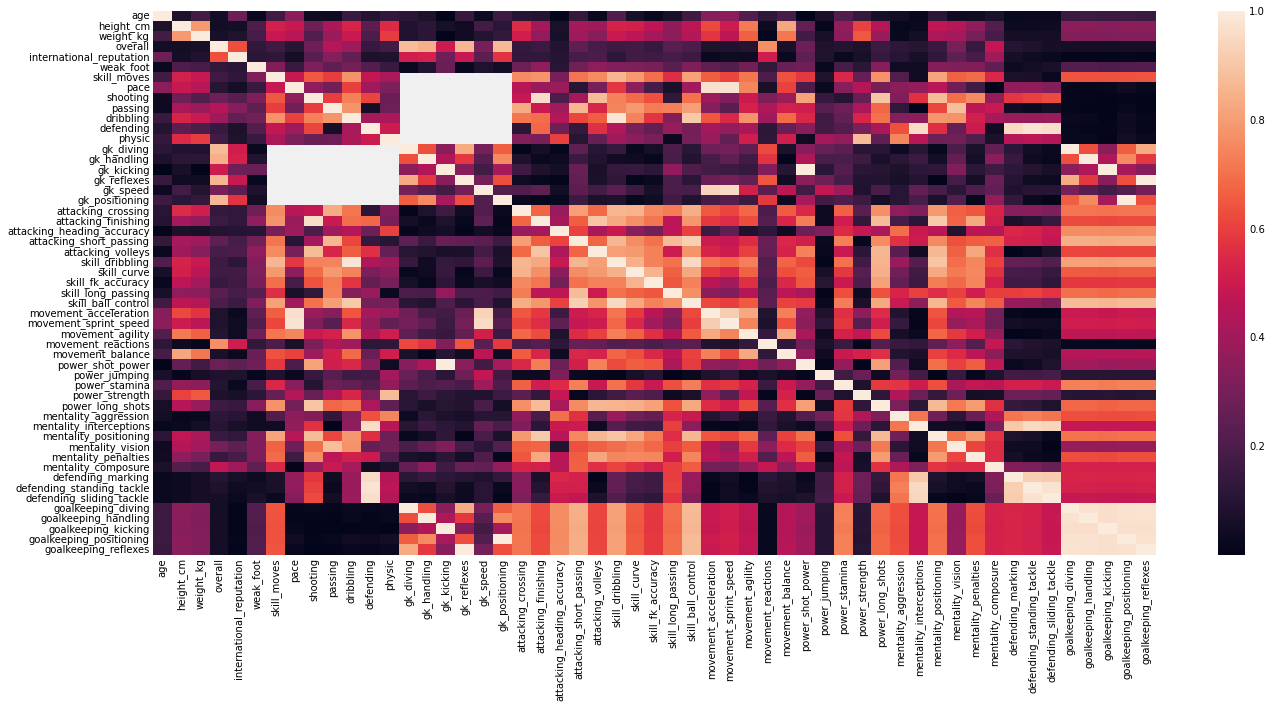

In [ ]:
# Plotting a heat map to detect correlated features
plt.figure(figsize=(20,10))
ax = sb.heatmap(corr_matrix)

Goalkeeper features are correlated

In [ ]:
# The white squares in the heatmap show that the features related to goalkeepers are correlated perfectly.
feature_goalkeep = ['gk_handling','gk_reflexes','gk_positioning','gk_diving','gk_kicking','gk_speed',\
                       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
data = data.drop(feature_goalkeep, axis = 1)
# Goalkeepers form a isolated group because no main player skills apply to them. Thus, goalkeepers are removed from the dataset as we have a clear indication of them being a separate cluster.

In [ ]:
data = data[data.player_positions !='GK']

Drop categorical features

In [ ]:
# All the features that are categorical are dropped as PCA needs continuous features only.
feature_category = ['short_name','nationality','club','preferred_foot','player_positions','international_reputation','weak_foot','skill_moves']
data = data.drop(feature_category, axis =1)
data = data.fillna(0)
data.shape

(5137, 39)

Building a Decision Tree Regressor to eliminate more correlated features using R2 score

In [ ]:
def features(data, feature, random_state, R2score):   #regression model is built on remaining features acting as the response and all other features act as predictors.
    new = data.drop(feature, axis = 1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new, data[feature], test_size = 0.20, random_state = random_state)

    from sklearn.tree import DecisionTreeRegressor  #Importing a decision tree regressor from Skikitlearn
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score =  regressor.score(X_test, y_test)
    if score >= 0.95:     #The R2 scores for response > 0.95 is considered as the variance in these features can be explained by the remaining variables and they do not add a lot of further information to our analysis.
        R2score.append(feature)
        print("R2 Score for feature {} is {}".format(feature, round(score,3) ))
    else:
        pass
    return R2score

In [ ]:
R2score = []
for key in data:
    features(data, key, random_state=13263600,R2score=R2score)

R2 Score for feature pace is 0.997
R2 Score for feature shooting is 0.984
R2 Score for feature passing is 0.957
R2 Score for feature dribbling is 0.982
R2 Score for feature defending is 0.99
R2 Score for feature physic is 0.956
R2 Score for feature attacking_finishing is 0.968
R2 Score for feature skill_dribbling is 0.966
R2 Score for feature movement_acceleration is 0.985
R2 Score for feature movement_sprint_speed is 0.99
R2 Score for feature defending_standing_tackle is 0.954


Dropping features with R2 score >= 0.95

In [ ]:
data = data.drop(R2score, axis = 1) #Since the R2 scores are so high, these features can be calculated using the other independent features, thus drop them.
print(data.shape)
data.head()

(5137, 28)


,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
0,32,170,72,94,88,70,92,88,93,94,...,68,94,48,40,94,94,75,96,33,26
1,34,187,83,93,84,89,83,87,81,76,...,78,93,63,29,95,82,85,95,28,24
2,27,175,68,92,87,62,87,87,88,87,...,49,84,51,36,87,90,90,94,27,29
4,28,175,74,91,81,61,89,83,83,79,...,63,80,54,41,87,89,88,91,34,22
5,28,181,70,91,93,55,92,82,85,83,...,74,90,76,61,88,94,79,91,68,51


## Feature Scaling and Transforming the data for PCA

Tweaked Dataset distribution

In [ ]:
data.describe()

,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
count,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,...,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,27.238466,180.846019,75.636948,74.111154,61.991435,63.390695,70.702939,54.812147,60.446759,54.202842,...,70.092272,60.560055,66.917656,57.048277,62.718123,63.685420,58.130816,69.945688,57.036208,54.375900
std,3.956364,6.577557,6.848237,3.774699,13.665833,11.807095,6.730381,15.634589,15.046577,15.943159,...,11.576747,14.857905,13.383629,19.804241,14.866945,12.294777,12.978836,7.029337,18.685654,21.101802
min,16.000000,156.000000,52.000000,70.000000,11.000000,20.000000,41.000000,11.000000,12.000000,10.000000,...,27.000000,12.000000,22.000000,10.000000,12.000000,13.000000,13.000000,32.000000,10.000000,10.000000
25%,24.000000,176.000000,71.000000,71.000000,55.000000,56.000000,67.000000,43.000000,51.000000,41.000000,...,63.000000,54.000000,59.000000,39.000000,56.000000,58.000000,49.000000,65.000000,41.000000,34.000000
50%,27.000000,181.000000,75.000000,73.000000,65.000000,65.000000,71.000000,58.000000,64.000000,56.000000,...,71.000000,65.000000,70.000000,66.000000,67.000000,66.000000,60.000000,70.000000,65.000000,64.000000
75%,30.000000,186.000000,80.000000,76.000000,72.000000,72.000000,75.000000,67.000000,72.000000,68.000000,...,78.000000,71.000000,76.000000,73.000000,73.000000,72.000000,68.000000,75.000000,72.000000,72.000000
max,41.000000,203.000000,101.000000,94.000000,93.000000,93.000000,92.000000,90.000000,94.000000,94.000000,...,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,90.000000


We perform log scaling as it gave the best results from the rest

In [ ]:
from sklearn.decomposition import PCA
def results_of_pca(data, n_components=8):
    #PCA model
    model_pca = PCA(n_components=n_components, random_state=1).fit(data)
    
    # Creating a dataframe
    dim = ['Dimension {}'.format(i) for i in range(1,len(model_pca.components_)+1)]
    comp = pd.DataFrame(np.round(model_pca.components_, 4), columns = list(data.columns))
    comp.index = dim

    # PCA explained variance
    ratios = model_pca.explained_variance_ratio_.reshape(len(model_pca.components_), 1)
    ratio_variance = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    ratio_variance.index = dim

    # Bar plot visualization
    fig, ax = plt.subplots(figsize = (25,10))

    # Plot the feature weights as a function of the components
    comp.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dim, rotation=0)
    plt.legend(loc='upper right')

    # Display the explained variance ratios
    for i, ev in enumerate(model_pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    df = pd.concat([ratio_variance, comp], axis = 1)
    print(f'Total Variance Explained by the first 2 dimensions: {df.iloc[:2,0].sum()}')
    return df

In [ ]:
logscaled_data = np.log(data)

In [ ]:
def transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sb.kdeplot(data[col], shade=True)
    plt.legend(loc='best');

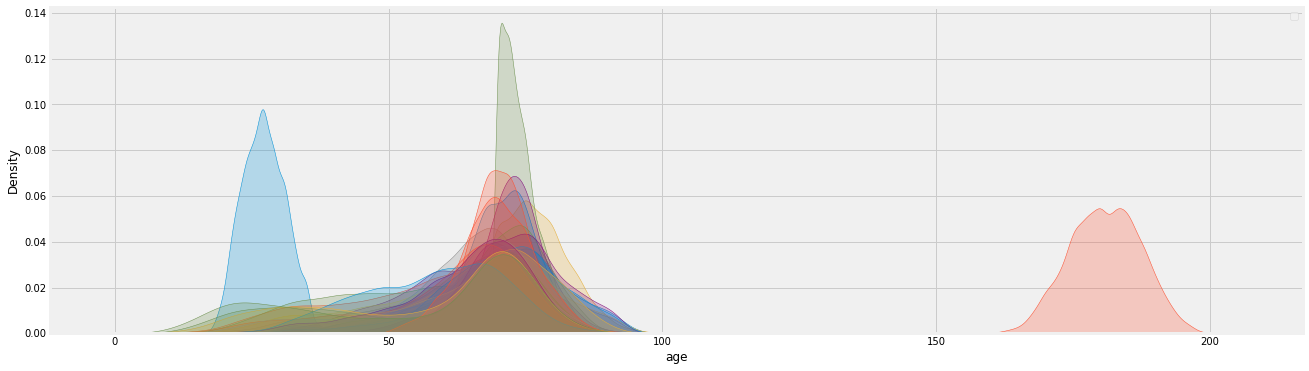

In [ ]:
transformed_data(data)  #Unscaled data
# We can notice that the features are slightly left-skewed.

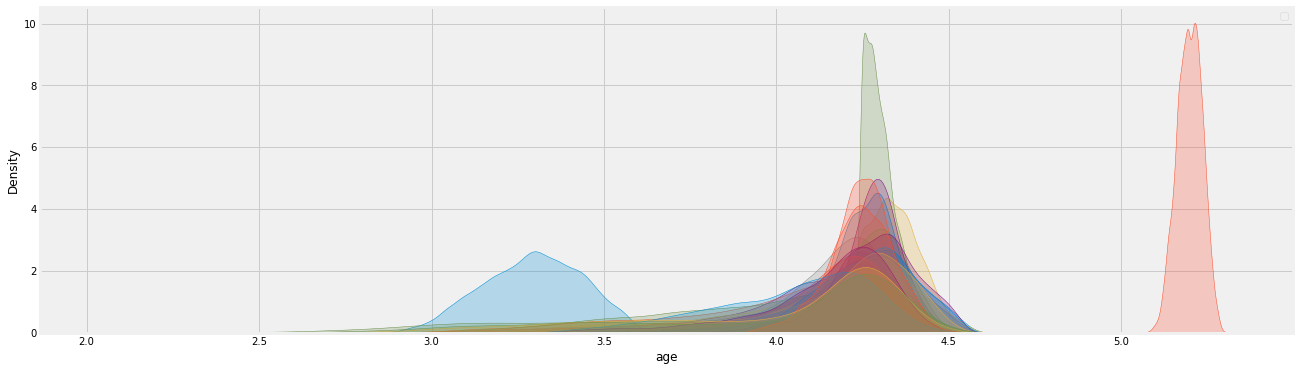

In [ ]:
transformed_data(logscaled_data)  #Scaled data using Log Scaling

Total Variance Explained by the first 2 dimensions: 0.6837


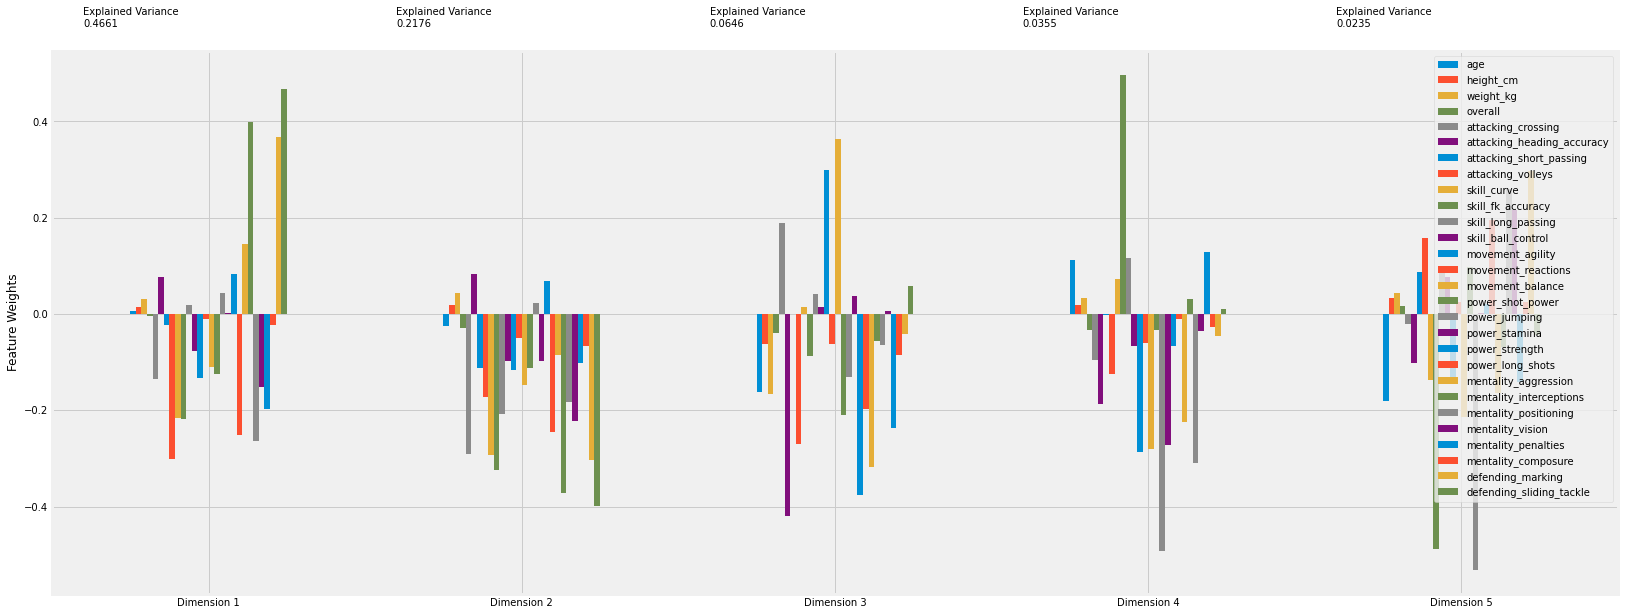

In [ ]:
pca_logscale = results_of_pca(logscaled_data, 5)  #For every feature, the variance for every dimension is calculated. An average of this variance is taken finally.

##  PCA Analysis

Making a Biplot for PCA analysis

In [ ]:
def construct_pca(data, sample_ids):
    pca = PCA(n_components=2).fit(data)  #pca object that contains the components_ attribute
    data_reduced = pca.transform(logscaled_data)  ## the first two dimensions are plotted
    samples_of_pca = pca.transform(logscaled_data[logscaled_data.index.isin(sample_ids)])
    data_reduced = pd.DataFrame(data_reduced, columns = ['Dimension 1', 'Dimension 2'])
    return pca, data_reduced, samples_of_pca

In [ ]:
pca, data_reduced, samples_of_pca = construct_pca(logscaled_data, sample_ids = sample_generate(['CAM','CM']))

In [ ]:
def biplot(log_data, data_reduced, pca):  #Biplot shows the scatterplot of the reduced data and the original features' projections.
    
    fig, ax = plt.subplots(figsize = (10,10))
    # scatterplot of the reduced data    
    ax.scatter(x=data_reduced.loc[:, 'Dimension 1'], y=data_reduced.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)   
    
    feature_vectors = pca.components_.T

    # To see arrows and text easily
    arrow_size, text_pos = 4.0, 3.0,

    # Original features projections
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, log_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)
    
    ax.set_xlabel("Dimension 1 (PC1)", fontsize=14)
    ax.set_ylabel("Dimension 2 (PC2)", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

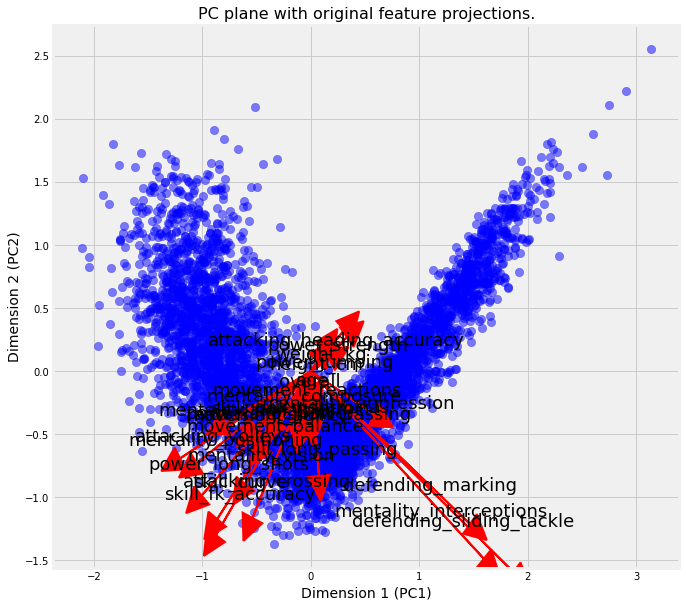

In [ ]:
biplot(logscaled_data, data_reduced, pca);

## Clustering

Silhouette score to determine the no. of clusters

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def clustering(reduced_data,n_clusters,pca_samples=samples_of_pca):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

def score_silhouette(reduced_data,n_clusters):
    preds,_,_ = clustering(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,10):
    score = score_silhouette(data_reduced,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 2 cluster is 0.49167101337803015


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 3 cluster is 0.532304043294748


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 4 cluster is 0.46855201626678106


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 5 cluster is 0.4473965009063058


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 6 cluster is 0.41262103671162487


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 7 cluster is 0.3920905797402225


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 8 cluster is 0.37465405000803154


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Silhoutte Score for 9 cluster is 0.36955079385662715


The highest Silhouette Score is 0.53 for 3 clusters

Alternate Elbow method to to determine the no. of clusters

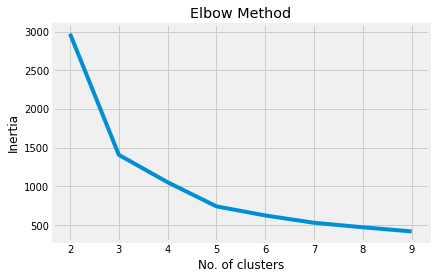

In [ ]:
inertia = []
clusters = range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(data_reduced)
    preds = clusterer.predict(data_reduced)
    inertia.append(clusterer.inertia_)

plt.plot(clusters, inertia)
plt.ylabel('Inertia')
plt.xlabel('No. of clusters')
plt.title('Elbow Method');

The value of K is derived from the elbow of the curve plotted above. 

The elbow of the curve appears at **3 clusters** which coincides with the Silhouette score too.

## Visualizing the clusters

In [ ]:
def visualize_cluster_results(reduced_data, preds, centers, pca_samples):
    
    import matplotlib.cm as cm
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generating cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    colormap = cm.get_cmap('gist_rainbow')

    # Color the points according to the assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = colormap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Indicate the cluster using indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plotting transformed sample data points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Plot title
    ax.set_title("Clustering on PCA-Reduced Data");

In [ ]:
copy_of_dataset.player_positions.unique()

array(['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB',
       'RM', 'LM', 'LWB', 'RWB'], dtype=object)

## Results

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


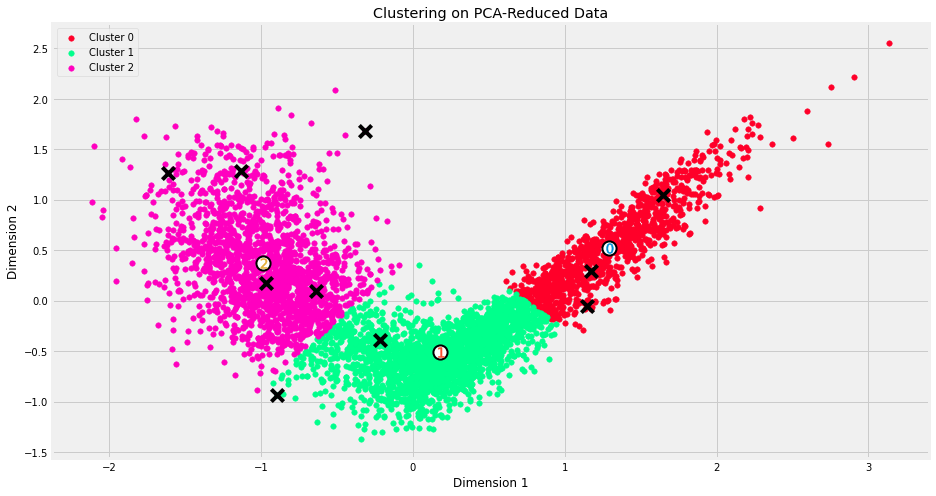

In [ ]:
sample_ids = sample_generate(['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB'], 10)
# Using the general unique player positions, the players are classified into generalized communities, i.e, into 3 main clusters
_, _, pca_samples = construct_pca(logscaled_data, sample_ids)
preds, centers, sample_preds = clustering(data_reduced, 3)
visualize_cluster_results(data_reduced, preds, centers, pca_samples)

Final Analysis

We should revisit the Biplot image from before in order to comprehend why K Means returned the clusters that it did.
It is clear when comparing the clusters and the feature vectors after the Biplot transfers the original features as vectors to the principal components.


Let's look at Cluster 0, also seen as the Red cluster, as an illustration. On the basis of the random samples, we have deduced that there are several defenders. Now, if we look at the Biplot, we can see that some of the feature vectors, such as defending_marking, mentality_interceptions, defending_sliding_tackle, have a significant impact along the direction of this cluster.

Similar to cluster 1, we can see that skill_long_passing, short_passing, power_stamina, mental_composure etc. are the most crucial characteristics. As a result, we can conclude that midfielders are the players that exhibit these qualities, and we can pinpoint the individuals in this group who are most suited for a midfielder position.

Finally, a forward player's primary responsibility is to score goals, so it goes without saying that the crucial characteristics in this regard are attacking, volleys, mentality_positioning, attacking_header_accuracy are a few of the important ones.